# Battle of the Neighborhoods - by Mahmudin Rizal

# Introduction

work and study are activities that almost everyone does. In practice, it is often found that humans need a place to study and work other than at home, office, or at school. Usually places like coffee shops are another main choice besides previous places, but lately there are also many people who want to study or work in coworking spaces. In this project, we will examine where is the best place to set up a coworking space, considering that this business is promising. Some conditions may be used, such as one that must be a busy place or close to several crowded places and easy to access. This project is carried out for the area around the city of Bekasi, Indonesia

# Data

The data used is data about the dibekasi area, including population, latitude, and longitude. All data related to locations will be obtaine by using FourSquare API and Python Libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import requests
import lxml.html as lh
import urllib.request
import numpy as np 
import pandas as pd
from bs4 import BeautifulSoup


print('Libraries imported.')

Libraries imported.


In [14]:
df=pd.read_csv('bekasi.txt')

In [15]:
df

,District,total population,Latitude,Longitude
0,Pondok Gede,320249,-6.2700,106.9300
1,Jati Sampurna,161207,-6.3621,106.9300
2,Pondok Melati,166432,-6.3109,106.9300
3,Jatiasih,265551,-6.3101,106.9536
4,Bantar Gebang,129511,-6.3116,106.9860
5,Mustikajaya,294944,-6.2949,107.0274
6,Bekasi Timur,260759,-6.2363,107.0244
7,Rawalumbu,278816,-6.2779,107.0008
8,Bekasi Selatan,234235,-6.2582,106.9772
9,Bekasi Barat,306220,-6.2382,106.9654


# Exploring District

Let's visualize the data 

In [29]:
address = 'Bekasi,Indonesia'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of Rawalumbu,Bekasi are {}, {}.'.format(latitude_x, longitude_y))

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The Geograpical Co-ordinate of Rawalumbu,Bekasi are -6.2349858, 106.9945444.


In [40]:
map_bekasi = folium.Map(location=[latitude_x, longitude_y], zoom_start=13)

for lat, lng, district in zip(df['Latitude'], df['Longitude'], df['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=30,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_bekasi)  
    
map_bekasi

Define Foursquare Credentials and Version

In [34]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

Let's create a function to get all the District in Bekasi, Indonesia

In [61]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [62]:
bekasi_venues = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'])

Pondok Gede
Jati Sampurna
Pondok Melati
Jatiasih
Bantar Gebang
Mustikajaya
Bekasi Timur
Rawalumbu
Bekasi Selatan
Bekasi Barat
Medansatria
Bekasi utara


In [63]:
bekasi_venues

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Pondok Gede,-6.2700,106.9300,Superindo,-6.274847,106.935564,Department Store
1,Pondok Gede,-6.2700,106.9300,Foodcourt Kolam Renang Graha Kresna Pratama,-6.271494,106.922980,Food Court
2,Pondok Gede,-6.2700,106.9300,Kolam Renang Graha Kresna Pratama (GKP),-6.271725,106.923005,Pool
3,Pondok Gede,-6.2700,106.9300,Graha Kresna Pratama,-6.271640,106.922998,Pool
4,Pondok Gede,-6.2700,106.9300,Lontong Sayur SPBU 34-17115 Kemang,-6.274482,106.935427,Breakfast Spot
5,Pondok Gede,-6.2700,106.9300,Perumahan jatibening 2,-6.264123,106.934743,Park
6,Pondok Gede,-6.2700,106.9300,Argon Fitness,-6.271462,106.922928,Gym / Fitness Center
7,Pondok Gede,-6.2700,106.9300,Cafetaria Iboe n Pa'ndoet,-6.276248,106.929046,Café
8,Pondok Gede,-6.2700,106.9300,Alfamart JL.AL jatimakmur,-6.276467,106.926864,Food & Drink Shop
9,Pondok Gede,-6.2700,106.9300,ALFAmidi - Uringin,-6.268353,106.922541,Grocery Store


Let's check how many venues were returned for each borough and sort them in count

In [67]:
summary = bekasi_venues.groupby('District').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['District Latitude', 'District Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary

,District,Count
0,Bantar Gebang,4
1,Bekasi utara,4
2,Jati Sampurna,4
3,Mustikajaya,5
4,Jatiasih,7
5,Medansatria,9
6,Pondok Gede,10
7,Bekasi Barat,12
8,Rawalumbu,13
9,Bekasi Timur,14


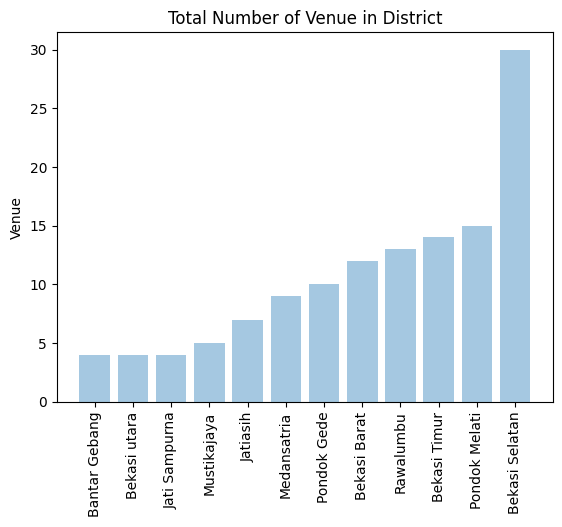

In [68]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.District
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in District')
plt.xticks(rotation=90)

plt.show()

In [90]:
bekasi_venues['Venue Category'].value_counts()

Coffee Shop                  10
Indonesian Restaurant         8
Food Truck                    5
Spa                           5
Pool                          5
Restaurant                    4
Arcade                        4
Fast Food Restaurant          4
Asian Restaurant              4
Café                          3
Steakhouse                    3
Food                          3
Department Store              3
Convenience Store             3
Pizza Place                   3
Soccer Stadium                3
Food & Drink Shop             2
Supermarket                   2
Park                          2
Ice Cream Shop                2
Market                        2
Multiplex                     2
Food Court                    2
Seafood Restaurant            2
Bakery                        2
Flea Market                   2
Grocery Store                 2
Middle Eastern Restaurant     2
Shopping Mall                 2
Athletics & Sports            1
Basketball Court              1
Bookstor

In [115]:
bekasi_onehot = pd.get_dummies(bekasi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bekasi_onehot['District']=bekasi_venues['District']
# Note: In the lab, the column name in the dummy variale df is the same as the one in no-dv df. Here it won't work.
#       Column names must be different.

# move neighborhood column to the first column
fixed_columns = [bekasi_onehot.columns[-1]] + list(bekasi_onehot.columns[:-1])
bekasi_onehot = bekasi_onehot[fixed_columns]

# check the number of rows. It must be equal to that of venues
print("The shape of the dataframe is {}. The dataset has {} rows.".format
      (bekasi_onehot.shape,bekasi_onehot.shape[0]))

# print top 5 rows
bekasi_onehot.head()

The shape of the dataframe is (127, 61). The dataset has 127 rows.


,District,American Restaurant,Arcade,Asian Restaurant,Athletics & Sports,Bakery,Basketball Court,Bistro,Bookstore,Breakfast Spot,Burger Joint,Café,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Creperie,Department Store,Dessert Shop,Dim Sum Restaurant,Fast Food Restaurant,Field,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Furniture / Home Store,Grocery Store,Gym / Fitness Center,Hospital,Ice Cream Shop,Indonesian Restaurant,Internet Cafe,Karaoke Bar,Manadonese Restaurant,Market,Middle Eastern Restaurant,Multiplex,Nightclub,Noodle House,Outlet Store,Park,Pharmacy,Pizza Place,Playground,Pool,Racetrack,Restaurant,Salon / Barbershop,Seafood Restaurant,Shop & Service,Shopping Mall,Snack Place,Soccer Stadium,Spa,Stadium,Steakhouse,Supermarket,Thrift / Vintage Store,Track Stadium
0,Pondok Gede,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Pondok Gede,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Pondok Gede,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Pondok Gede,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Pondok Gede,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
bekasi_grouped = bekasi_onehot.groupby('District').mean().reset_index()

print("The shape of the dataframe is {}. The dataset has {} rows.".format
      (bekasi_grouped.shape,bekasi_grouped.shape[0]))

# Print the top 5 rows
bekasi_grouped.head()
# Note: The sum of all column values for each row is 1 (100%). The number in each cell represents relative frequency

The shape of the dataframe is (12, 61). The dataset has 12 rows.


,District,American Restaurant,Arcade,Asian Restaurant,Athletics & Sports,Bakery,Basketball Court,Bistro,Bookstore,Breakfast Spot,Burger Joint,Café,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Creperie,Department Store,Dessert Shop,Dim Sum Restaurant,Fast Food Restaurant,Field,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Furniture / Home Store,Grocery Store,Gym / Fitness Center,Hospital,Ice Cream Shop,Indonesian Restaurant,Internet Cafe,Karaoke Bar,Manadonese Restaurant,Market,Middle Eastern Restaurant,Multiplex,Nightclub,Noodle House,Outlet Store,Park,Pharmacy,Pizza Place,Playground,Pool,Racetrack,Restaurant,Salon / Barbershop,Seafood Restaurant,Shop & Service,Shopping Mall,Snack Place,Soccer Stadium,Spa,Stadium,Steakhouse,Supermarket,Thrift / Vintage Store,Track Stadium
0,Bantar Gebang,0.0,0.000000,0.000000,0.0,0.25,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.25,0.000000,0.25,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,Bekasi Barat,0.0,0.000000,0.083333,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.0,0.083333,0.000000,0.00,0.000000,0.00,0.083333,0.0,0.0,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.0,0.0,0.000000,0.0,0.083333,0.0,0.0,0.0,0.000000,0.0,0.083333,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.083333,0.000000,0.0,0.000000,0.166667,0.000000,0.0
2,Bekasi Selatan,0.0,0.033333,0.033333,0.0,0.00,0.0,0.033333,0.033333,0.0,0.033333,0.0,0.033333,0.133333,0.0,0.033333,0.000000,0.000000,0.033333,0.033333,0.000000,0.0,0.000000,0.033333,0.00,0.033333,0.10,0.000000,0.0,0.0,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.0,0.0,0.033333,0.0,0.000000,0.0,0.0,0.0,0.066667,0.0,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.033333,0.0,0.000000,0.133333,0.0,0.033333,0.000000,0.033333,0.0
3,Bekasi Timur,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.071429,0.0,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.071429,0.071429,0.071429,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.071429,0.0,0.00,0.071429,0.000000,0.0,0.071429,0.071429,0.0,0.142857,0.000000,0.000000,0.0
4,Bekasi utara,0.0,0.000000,0.250000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.250000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.25,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


Clustering

In [117]:
kclusters = 3

bekasi_grouped_clustering = bekasi_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bekasi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [118]:
bekasi_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
# Left join
bekasi_merged=pd.merge(df,bekasi_grouped,how='left',left_on='District',right_on='District')



# Rename column
bekasi_merged.rename(columns={'District_x':'District'},inplace=True)

bekasi_merged.head()

,District,total population,Latitude,Longitude,Cluster Labels,American Restaurant,Arcade,Asian Restaurant,Athletics & Sports,Bakery,Basketball Court,Bistro,Bookstore,Breakfast Spot,Burger Joint,Café,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Creperie,Department Store,Dessert Shop,Dim Sum Restaurant,Fast Food Restaurant,Field,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Furniture / Home Store,Grocery Store,Gym / Fitness Center,Hospital,Ice Cream Shop,Indonesian Restaurant,Internet Cafe,Karaoke Bar,Manadonese Restaurant,Market,Middle Eastern Restaurant,Multiplex,Nightclub,Noodle House,Outlet Store,Park,Pharmacy,Pizza Place,Playground,Pool,Racetrack,Restaurant,Salon / Barbershop,Seafood Restaurant,Shop & Service,Shopping Mall,Snack Place,Soccer Stadium,Spa,Stadium,Steakhouse,Supermarket,Thrift / Vintage Store,Track Stadium
0,Pondok Gede,320249,-6.2700,106.9300,1,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.1,0.0,0.100000,0.0,0.000000,0.000000,0.0,0.0,0.1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.10,0.1,0.000000,0.0,0.10,0.1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.100000,0.0,0.000000,0.0,0.200000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Jati Sampurna,161207,-6.3621,106.9300,1,0.0,0.250000,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.250000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pondok Melati,166432,-6.3109,106.9300,1,0.0,0.000000,0.0,0.066667,0.00,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.0,0.0,0.0,0.0,0.0,0.066667,0.000000,0.0,0.000000,0.00,0.0,0.066667,0.0,0.00,0.0,0.0,0.0,0.133333,0.0,0.0,0.0,0.066667,0.066667,0.000000,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.0,0.000000,0.0,0.133333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Jatiasih,265551,-6.3101,106.9536,1,0.0,0.142857,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.142857,0.0,0.142857,0.00,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.142857,0.0,0.142857,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bantar Gebang,129511,-6.3116,106.9860,2,0.0,0.000000,0.0,0.000000,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.25,0.0,0.250000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bekasi_merged['Latitude'], bekasi_merged['Longitude'], bekasi_merged['District'], bekasi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters